In [2]:
#Jupyter notebook for local demo of qiskit. No connection to server.
#qiskit.QuantumCircuit provides a simulation

#from qiskit import QuantumCircuit

In [4]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

from keras.datasets import mnist
from matplotlib import pyplot

In [3]:
#Bell state circuit
#Hadamard gate generates superposition, cnot imparts entanglement.

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [5]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

┌───┐ ░                                       ░                    »
   q_0: ┤ H ├─░─────■──────■─────────────■────────────░──────────■──────■──»
        ├───┤ ░     │    ┌─┴─┐         ┌─┴─┐          ░ ┌───┐    │    ┌─┴─┐»
   q_1: ┤ H ├─░─────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├»
        └───┘ ░ ┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘»
   q_2: ──────░─┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────»
              ░ └───────┘     └───────┘     └───────┘ ░      └───────┘     »
meas: 3/═══════════════════════════════════════════════════════════════════»
                                                                           »
«                                ░ ┌───┐                                     »
«   q_0: ───────────■────────────░─┤ X ├────■──────■─────────────■───────────»
«                 ┌─┴─┐          ░ ├───┤    │    ┌─┴─┐         ┌─┴─┐         »
«   q_1: ────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├────■────┤ X ├────■────»
«        ┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐»
«   q_2: ┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├»
«        └───────┘     └───────┘ ░      └───────┘     └───────┘     └───────┘»
«meas: 3/════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░                                            ░ ┌─┐      
«   q_0: ─░──────────■──────■─────────────■────────────░─┤M├──────
«         ░ ┌───┐    │    ┌─┴─┐         ┌─┴─┐          ░ └╥┘┌─┐   
«   q_1: ─░─┤ X ├────┼────┤ X ├────■────┤ X ├────■─────░──╫─┤M├───
«         ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░  ║ └╥┘┌─┐
«   q_2: ─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──╫──╫─┤M├
«         ░      └───────┘     └───────┘     └───────┘ ░  ║  ║ └╥┘
«meas: 3/═════════════════════════════════════════════════╩══╩══╩═
«                                                         0  1  2

{'001': 1003, '010': 1075, '011': 1033, '000': 985}


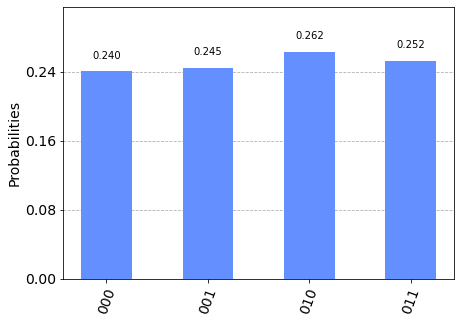

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [7]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw()

┌───┐ ░                                              ░                 »
   q_0: ┤ H ├─░──────■───────■────────────────■──────────────░───────────■─────»
        ├───┤ ░      │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     »
   q_1: ┤ H ├─░──────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────»
        └───┘ ░ ┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐»
   q_2: ──────░─┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├»
              ░ └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘»
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                          ░ ┌───┐                            »
«   q_0: ──■────────────────■──────────────░─┤ X ├─────■───────■──────────────»
«        ┌─┴─┐            ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            »
«   q_1: ┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────»
«        └───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐»
«   q_2: ─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├»
«             └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘»
«meas: 3/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                         ░                                                  »
«   q_0: ──■──────────────░───────────■───────■────────────────■─────────────»
«        ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐           »
«   q_1: ┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■─────»
«        └───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐»
«   q_2: ─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├»
«             └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘»
«meas: 3/════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░ ┌─┐      
«   q_0: ─░─┤M├──────
«         ░ └╥┘┌─┐   
«   q_1: ─░──╫─┤M├───
«         ░  ║ └╥┘┌─┐
«   q_2: ─░──╫──╫─┤M├
«         ░  ║  ║ └╥┘
«meas: 3/════╩══╩══╩═
«            0  1  2

{'100': 1059, '111': 990, '101': 1030, '110': 1017}


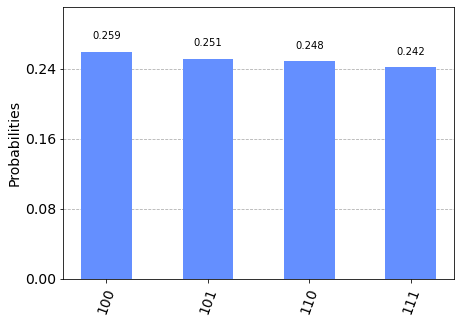

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc1 = transpile(qc1, aer_sim)
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

In [84]:
theta = pi/4  # all pixels white
qc2 = qk.QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()
#Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()
#Pixel 2

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)


qc2.barrier()

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw()

┌───┐ ░                                              ░                 »
   q_0: ┤ H ├─░──────■───────■────────────────■──────────────░───────────■─────»
        ├───┤ ░      │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     »
   q_1: ┤ H ├─░──────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────»
        └───┘ ░ ┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐»
   q_2: ──────░─┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├»
              ░ └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘»
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                          ░ ┌───┐                            »
«   q_0: ──■────────────────■──────────────░─┤ X ├─────■───────■──────────────»
«        ┌─┴─┐            ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            »
«   q_1: ┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────»
«        └───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐»
«   q_2: ─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├»
«             └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘»
«meas: 3/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                         ░                                                  »
«   q_0: ──■──────────────░───────────■───────■────────────────■─────────────»
«        ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐           »
«   q_1: ┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■─────»
«        └───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐»
«   q_2: ─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├»
«             └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘»
«meas: 3/════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░ ┌─┐      
«   q_0: ─░─┤M├──────
«         ░ └╥┘┌─┐   
«   q_1: ─░──╫─┤M├───
«         ░  ║ └╥┘┌─┐
«   q_2: ─░──╫──╫─┤M├
«         ░  ║  ║ └╥┘
«meas: 3/════╩══╩══╩═
«            0  1  2

In [74]:
theta = 0  # all pixels white
qc2 = qk.QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()
#Pixel 1

theta = 0

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()
#Pixel 2

theta = pi/6

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

theta = pi/3

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)


qc2.barrier()

theta = pi/2

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw()

┌───┐ ░                                       ░                      »
   q_0: ┤ H ├─░─────■──────■─────────────■────────────░───────────■───────■──»
        ├───┤ ░     │    ┌─┴─┐         ┌─┴─┐          ░ ┌───┐     │     ┌─┴─┐»
   q_1: ┤ H ├─░─────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├─────┼─────┤ X ├»
        └───┘ ░ ┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌────┴────┐└───┘»
   q_2: ──────░─┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(π/6) ├─────»
              ░ └───────┘     └───────┘     └───────┘ ░      └─────────┘     »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                     ░ ┌───┐                                 »
«   q_0: ──────────────■──────────────░─┤ X ├─────■───────■────────────────■──»
«                    ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            ┌─┴─┐»
«   q_1: ─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├»
«        ┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘»
«   q_2: ┤ Ry(-π/6) ├─────┤ Ry(π/6) ├─░──────┤ Ry(π/3) ├─────┤ Ry(-π/3) ├─────»
«        └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     »
«meas: 3/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                    ░                                                   ░ ┌─┐»
«   q_0: ────────────░───────────■───────■────────────────■──────────────░─┤M├»
«                    ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐            ░ └╥┘»
«   q_1: ─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░──╫─»
«        ┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░  ║ »
«   q_2: ┤ Ry(π/3) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──╫─»
«        └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░  ║ »
«meas: 3/═══════════════════════════════════════════════════════════════════╩═»
«                                                                           0 »
«              
«   q_0: ──────
«        ┌─┐   
«   q_1: ┤M├───
«        └╥┘┌─┐
«   q_2: ─╫─┤M├
«         ║ └╥┘
«meas: 3/═╩══╩═
«         1  2

{'101': 483, '110': 534, '100': 529, '001': 557, '111': 490, '011': 517, '010': 506, '000': 480}


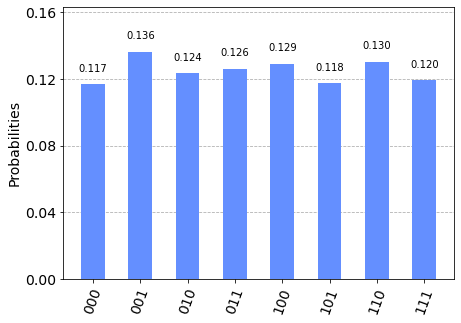

In [85]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc2 = transpile(qc2, aer_sim)
qobj = assemble(t_qc2, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc2)
print(counts)
plot_histogram(counts)

In [78]:
list(counts.keys())

['111', '010', '000', '001', '110', '101']

[[0.51546414 0.47733187]
 [0.50857092 0.49146435]]


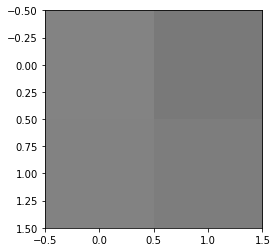

In [86]:
n = 1
ones_count_image = np.zeros((2**n,2**n))
total_count_image = np.zeros((2**n,2**n))
k = 0
for i in range(2**n):
    for j in range(2**n):
        b = bin(k)[2:].zfill(n+1)
        ones_count_image[i][j] += counts['1'+b]
        total_count_image[i][j] += counts['0'+b]
        total_count_image[i][j] += counts['1'+b]
        k += 1
normed_image = np.arcsin(np.sqrt(ones_count_image/total_count_image))/(pi/2)
print(normed_image)
pyplot.imshow(normed_image*255, cmap=pyplot.get_cmap('gray'), vmin=0, vmax=255)
pyplot.show()

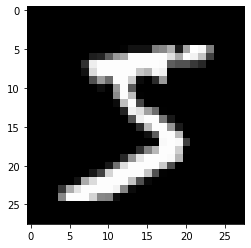

In [30]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
mnist_sample = train_X[0]
pyplot.imshow(mnist_sample, cmap=pyplot.get_cmap('gray'))
pyplot.show()

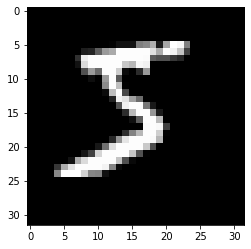

In [33]:
sample = np.zeros((32,32))
sample[:mnist_sample.shape[0],:mnist_sample.shape[1]] = mnist_sample
pyplot.imshow(sample, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [71]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

intensity_0: 
             
intensity_1: 
             
intensity_2: 
             
intensity_3: 
             
intensity_4: 
             
intensity_5: 
             
intensity_6: 
             
intensity_7: 
             
      idx_0: 
             
      idx_1: 
             
      cr: 10/

In [72]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

┌───┐ ░ 
intensity_0: ┤ I ├─░─
             ├───┤ ░ 
intensity_1: ┤ I ├─░─
             ├───┤ ░ 
intensity_2: ┤ I ├─░─
             ├───┤ ░ 
intensity_3: ┤ I ├─░─
             ├───┤ ░ 
intensity_4: ┤ I ├─░─
             ├───┤ ░ 
intensity_5: ┤ I ├─░─
             ├───┤ ░ 
intensity_6: ┤ I ├─░─
             ├───┤ ░ 
intensity_7: ┤ I ├─░─
             ├───┤ ░ 
      idx_0: ┤ H ├─░─
             ├───┤ ░ 
      idx_1: ┤ H ├─░─
             └───┘ ░ 
      cr: 10/════════

In [73]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░ 
intensity_0: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_1: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_2: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_3: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_4: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_5: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_6: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_7: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_0: ┤ H ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─
             └───┘ ░ └───┘ ░ 
      cr: 10/════════════════